# Limestone IDW Validation — FiveThirtyEight Style Plots

This notebook loads `limestone_validation_results.csv` and produces publication-quality plots using Matplotlib's `fivethirtyeight` style.

It summarizes:
- Spatial block CV (3x3) performance for rock head and thickness (baseline vs enhanced).
- Buffered LOOCV sensitivity (10/20/30/40%) for both variables and methods.


In [5]:
import os, csv
import math
import matplotlib.pyplot as plt

# Use FiveThirtyEight style
plt.style.use('fivethirtyeight')

# here = os.getcwd()
# csv_path = os.path.join(here, 'limestone_validation_results.csv')
csv_path="output/limestone_validation_results.csv"
print('Results CSV:', csv_path)

# Attempt to generate the CSV if missing
if not os.path.exists(csv_path):
    try:
        import validate_limestone_models as val
        val.main()  # will write limestone_validation_results.csv
    except Exception as e:
        print('Could not generate results automatically:', e)

assert os.path.exists(csv_path), 'Results CSV not found. Run validate_limestone_models.py first.'


Results CSV: output/limestone_validation_results.csv


In [6]:
# Load rows
rows = []
with open(csv_path, newline='', encoding='utf-8') as f:
    r = csv.DictReader(f)
    for row in r:
        # coerce numeric fields
        for k in ['k','p','theta','ratio','buffer','MAE','RMSE','R2']:
            v = row.get(k, '')
            try:
                row[k] = float(v) if v != '' else math.nan
            except Exception:
                row[k] = math.nan
        rows.append(row)

len(rows), rows[0].keys() if rows else []


(22,
 dict_keys(['variable', 'method', 'scheme', 'k', 'p', 'theta', 'ratio', 'buffer', 'grid', 'MAE', 'RMSE', 'R2', 'folds', 'n_test_points']))

In [7]:
# Helpers to filter
def filt(variable=None, method=None, scheme=None, scheme_prefix=None):
    out = []
    for r in rows:
        if variable and r.get('variable') != variable: continue
        if method and r.get('method') != method: continue
        if scheme and r.get('scheme') != scheme: continue
        if scheme_prefix and not str(r.get('scheme','')).startswith(scheme_prefix): continue
        out.append(r)
    return out

def savefig(path):
    plt.tight_layout()
    plt.savefig(path, dpi=160, bbox_inches='tight')
    print('Saved figure:', path)


Saved figure: fig_rock_blockcv.png


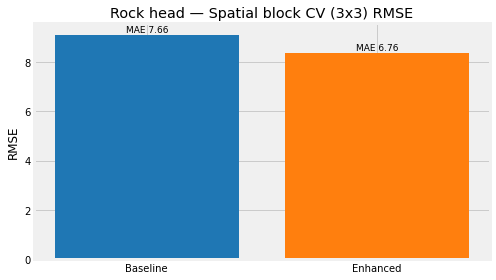

In [8]:
# Block CV (3x3) comparison — Rock head
rock_base = filt(variable='rock_head', scheme='block_cv_3x3', method='baseline')
rock_enh  = filt(variable='rock_head', scheme='block_cv_3x3', method='enhanced')
labels = ['Baseline', 'Enhanced']
rmse = [rock_base[0]['RMSE'] if rock_base else math.nan, rock_enh[0]['RMSE'] if rock_enh else math.nan]
mae  = [rock_base[0]['MAE'] if rock_base else math.nan, rock_enh[0]['MAE'] if rock_enh else math.nan]

fig, ax = plt.subplots(figsize=(7,4))
bars = ax.bar(labels, rmse, color=['#1f77b4','#ff7f0e'])
ax.set_title('Rock head — Spatial block CV (3x3) RMSE')
ax.set_ylabel('RMSE')
for b, m in zip(bars, mae):
    ax.text(b.get_x()+b.get_width()/2, b.get_height(), f'MAE {m:.2f}', ha='center', va='bottom', fontsize=9)
savefig('fig_rock_blockcv.png')
plt.show()


Saved figure: fig_thickness_blockcv.png


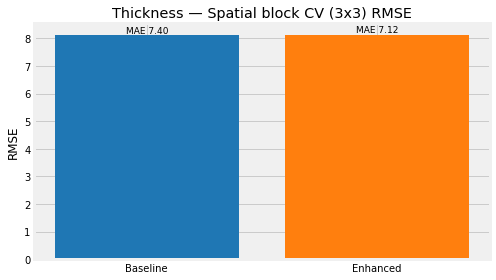

In [9]:
# Block CV (3x3) comparison — Thickness
th_base = filt(variable='thickness', scheme='block_cv_3x3', method='baseline')
th_enh  = filt(variable='thickness', scheme='block_cv_3x3', method='enhanced')
labels = ['Baseline', 'Enhanced']
rmse = [th_base[0]['RMSE'] if th_base else math.nan, th_enh[0]['RMSE'] if th_enh else math.nan]
mae  = [th_base[0]['MAE'] if th_base else math.nan, th_enh[0]['MAE'] if th_enh else math.nan]

fig, ax = plt.subplots(figsize=(7,4))
bars = ax.bar(labels, rmse, color=['#1f77b4','#ff7f0e'])
ax.set_title('Thickness — Spatial block CV (3x3) RMSE')
ax.set_ylabel('RMSE')
for b, m in zip(bars, mae):
    ax.text(b.get_x()+b.get_width()/2, b.get_height(), f'MAE {m:.2f}', ha='center', va='bottom', fontsize=9)
savefig('fig_thickness_blockcv.png')
plt.show()


Saved figure: fig_rock_buffered_sensitivity.png


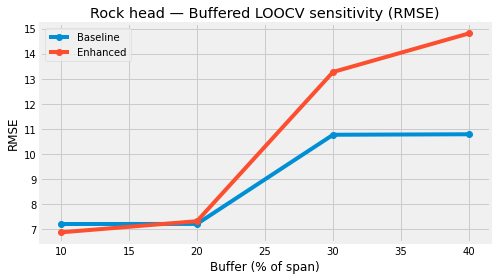

In [10]:
# Buffered LOOCV sensitivity — Rock head
buf_base = filt(variable='rock_head', scheme_prefix='buffered_loocv@', method='baseline')
buf_enh  = filt(variable='rock_head', scheme_prefix='buffered_loocv@', method='enhanced')
def pct(r):
    s = r.get('scheme','')
    try:
        return float(s.split('@')[1].replace('%',''))
    except Exception:
        return math.nan
x1 = [pct(r) for r in buf_base]
y1 = [r['RMSE'] for r in buf_base]
x2 = [pct(r) for r in buf_enh]
y2 = [r['RMSE'] for r in buf_enh]
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x1, y1, '-o', label='Baseline')
ax.plot(x2, y2, '-o', label='Enhanced')
ax.set_title('Rock head — Buffered LOOCV sensitivity (RMSE)')
ax.set_xlabel('Buffer (% of span)')
ax.set_ylabel('RMSE')
ax.legend()
savefig('fig_rock_buffered_sensitivity.png')
plt.show()


Saved figure: fig_thickness_buffered_sensitivity.png


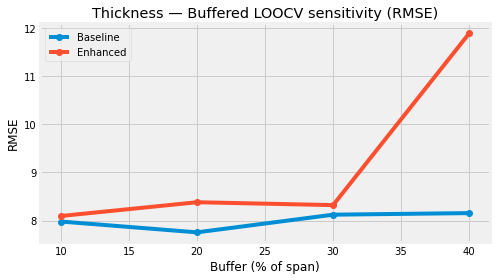

In [11]:
# Buffered LOOCV sensitivity — Thickness
buf_base = filt(variable='thickness', scheme_prefix='buffered_loocv@', method='baseline')
buf_enh  = filt(variable='thickness', scheme_prefix='buffered_loocv@', method='enhanced')
def pct(r):
    s = r.get('scheme','')
    try:
        return float(s.split('@')[1].replace('%',''))
    except Exception:
        return math.nan
x1 = [pct(r) for r in buf_base]
y1 = [r['RMSE'] for r in buf_base]
x2 = [pct(r) for r in buf_enh]
y2 = [r['RMSE'] for r in buf_enh]
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x1, y1, '-o', label='Baseline')
ax.plot(x2, y2, '-o', label='Enhanced')
ax.set_title('Thickness — Buffered LOOCV sensitivity (RMSE)')
ax.set_xlabel('Buffer (% of span)')
ax.set_ylabel('RMSE')
ax.legend()
savefig('fig_thickness_buffered_sensitivity.png')
plt.show()
